# Ramsey model with housing and a government sector

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [7]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
import ramsey_thje

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

In this model project, we extend the Ramsey model to include a housing market. In the first iteration, we solve the model assuming that housing supply is in fixed supply and that the housing stock does not depreciate over time. Most of the model is as described in the lecture notebook on the Ramsey model. Our changes to the mode are marked in <span style="color:red"> *red*</span>.

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Single infinitely-lived household.

**Household:** Households choose non-durable consumption, $C_t$ and durable housing $H_t$ such as to maximize discount lifetime utility. Labor is supplied exogenously, $N_{t}=1$, and earns a wage $w_{t}$. The return on saving is $r_{t+1}$. Utility is CRRA and given by: 

$$
\begin{aligned}
	U & =\max_{\{C_{t},\color{red}H_{t}, A_t\color{black}\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}\left(\frac{C_{t}^{1-\sigma}}{1-\sigma}\color{red}+\upsilon\frac{H_{t}^{1-\sigma_h}}{1-\sigma_h}\color{black}\right),\beta\in(0,1),\sigma>0\\
	& \text{s.t.}\\
	A_{t}+C_t+\color{red}q_tH_t\color{black}& =(1+r_{t})A_{t-1}+w_{t}N_{t} + \color{red}(q_{t}-\tau^H_t)H_{t-1}\color{black}
\end{aligned}
$$

where the left hand side of the budget constraint is expenditures on saving, consumption and housing. The right hand side is what is carried over in savings from last period, labor income and the amount of housing held from the last period. $\tau^H_t$ is a lump-sum tax paid per unit of housing.

**Firms:** Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$
and hires labor $L_{t}$ at the wage rate $w_{t}$.<br>
Firms have access to the production function
    
$$
\begin{aligned}
Y_{t} &= F(K_{t-1},L_{t}) \\ &=\Gamma_t(\alpha K_{t-1}^{-\theta}+(1-\alpha)L_{t}^{-\theta})^{\frac{1}{-\theta}},\,\,\,\theta>-1,\alpha\in(0,1),\Gamma_t>0
\end{aligned}
$$

Profits are

$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Government**: To keep things very simple, we assume that the government is not allowed to borrow nor save, and that the budget will always be balanced. In this case, government consumption will be given by: 

$$
G_t = \tau^H_t \bar{H},
$$
where we use the fact that the housing stock is fixed over time.

**Equilibrium:** The following conditions will be satisfied in equilibrium

1. Households maximize utility
2. Firms maximize profits
3. Labor market clear: $L_{t}=N_{t}=1$
4. Goods market clear: $Y_{t}=C_{t}+I_{t}$
5. <span style="color:red"> Housing market clear:</span>. $\color{red} \bar{H}=H_t$
6. Asset market clear: $A_{t}=K_{t}$ and $r_{t}=r_{t}^{k}-\delta$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

**Solution**: We can summarize the model in the non-linear equation system

$$
\begin{aligned}
\boldsymbol{\Psi}(\boldsymbol{K},\boldsymbol{C}, \color{red} \boldsymbol{q}\color{black},K_{-1})=\left[\begin{array}{c}
\Psi_{0}\\
\Psi_{1}\\
\begin{array}{c}
\vdots\end{array}
\end{array}\right]=\left[\begin{array}{c}
0\\
0\\
\begin{array}{c}
\vdots\end{array}
\end{array}\right]
\end{aligned}
$$

where $\boldsymbol{K} = [K_0,K_1\dots]$, $\boldsymbol{C} = [C_0,C_1\dots]$,  $\color{red}\boldsymbol{q} = [q_0,q_1\dots]$ and

$$
\begin{aligned}
\Psi_{t}
=\left[\begin{array}{c}
C_{t}^{-\sigma}-\beta(1+F_{K}(K_{t},1))C_{t+1}^{-\sigma}\\
K_{t}-[(1-\delta)K_{t-1} + F(K_{t-1},1)-C_{t}] \\
\color{red} \bar{H}^{-\sigma_h} + \beta C_{t+1}^{-\sigma}q_{t+1} - C_t^{-\sigma}q_t
\end{array}\right],
\end{aligned}
$$

where the last equation is derived by combining the FOC for housing demand with the assumption of fixed housing supply.

In [21]:
model = modelproject.RamseyModelClass1()
model.find_steady_state(KY_ss=(4.0,2))

initializing the model:
calling .setup()
calling .allocate()
K_ss = 4.00
Y_ss = 2.00
C_ss = 1.80
H_ss = 1.00
Gamma = 0.15
r_ss = 0.10
w_ss = 1.40
rk_ss = 0.15


## Analytical solution (steady state)

In addition to the code in the lectures, we have to solve for the steady state level of housing prices in the economy. To do this, we use our Euler equation for the housing market and the fact that in steady state $C_{t+1}=C_{t}=C^{ss}$. Using this, we can write: 

$$
q^{ss} = \frac{1}{1-\beta}\frac{\bar{H}^{-\sigma_h}}{(C^{ss})^{-\sigma}}
$$

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

**Initializing the model and creating an instance of class**:

In [2]:
model = ramsey_thje.RamseyModelClass()
par = model.par
ss = model.ss
path = model.path

initializing the model:
calling .setup()
calling .allocate()


**Finding the steady state of the model**:

In [3]:
model.find_steady_state(KY_ss=4.0)

Y_ss = 1.0000
C_ss = 0.8000
q_ss = 26.2400
K_ss/Y_ss = 4.0000
rk_ss = 0.0750
r_ss = 0.0250
w_ss = 0.7000
Gamma = 0.6598
beta = 0.9756


**Checking that there are no errors in steady state**:

In [4]:
# a. set initial value
par.K_lag_ini = ss.K

# b. set path
path.Gamma[:] = ss.Gamma
path.C[:] = ss.C
path.K[:] = ss.K
path.q[:] = ss.q

# c. check errors
errors_ss = model.evaluate_path_errors()
assert np.allclose(errors_ss,0.0)

**Solving the model:**

In [6]:
model.calculate_jacobian()
par.K_lag_ini = 0.50*ss.K # start away from steady state
model.solve() # find transition path

 it =   0 -> max. abs. error =   2.08774760
 it =   1 -> max. abs. error =   0.47429379
 it =   2 -> max. abs. error =   0.04788728
 it =   3 -> max. abs. error =   0.19495154
 it =   4 -> max. abs. error =   0.22027630
 it =   5 -> max. abs. error =   0.04719365
 it =   6 -> max. abs. error =   0.10063598
 it =   7 -> max. abs. error =   0.01021297
 it =   8 -> max. abs. error =   0.00664795
 it =   9 -> max. abs. error =   0.00063863
 it =  10 -> max. abs. error =   0.00037267
 it =  11 -> max. abs. error =   0.00005978
 it =  12 -> max. abs. error =   0.00001732
 it =  13 -> max. abs. error =   0.00000604
 it =  14 -> max. abs. error =   0.00000097
 it =  15 -> max. abs. error =   0.00000045
 it =  16 -> max. abs. error =   0.00000005
 it =  17 -> max. abs. error =   0.00000002
 it =  18 -> max. abs. error =   0.00000000


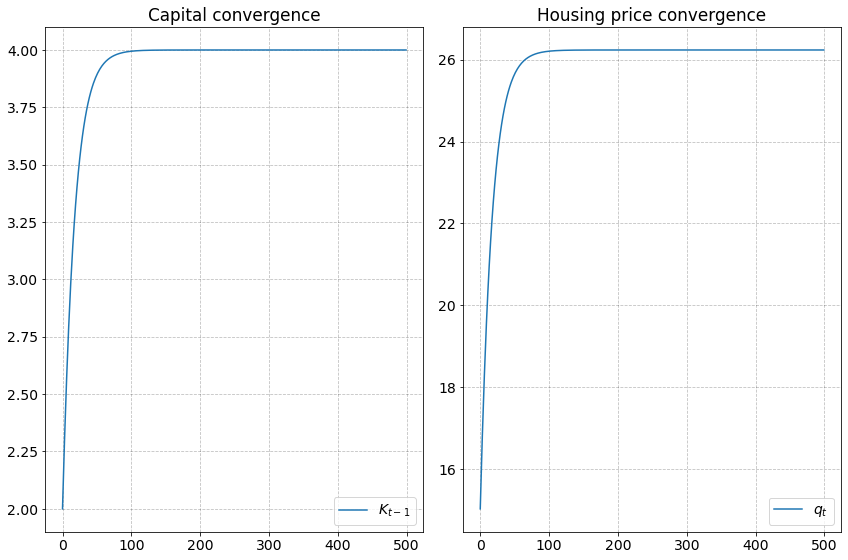

In [11]:
fig = plt.figure(figsize=(12,12/1.5))

ax = fig.add_subplot(1,2,1)
ax.plot(path.K_lag,label=r'$K_{t-1}$')
ax.legend(frameon=True)
ax.set_title('Capital convergence')
fig.tight_layout()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(path.q,label=r'$q_{t}$')
ax2.legend(frameon=True)
ax2.set_title('Housing price convergence')
fig.tight_layout()

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 